<h1 align='center'>Netflix: Movies and TV Shows</h1>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.gizmozones.com/wp-content/uploads/2019/07/netflix-icon-wallpaper-66504-68771-hd-wallpapers.jpg")

# Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning:** 
 - Deleting redundant columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations
4. **Data Visualization:** Using plots to find relations between the features.
    - Type: Movie and TV Shows
    - Rating
    - Relation between Type and Rating
5. **Word Cloud**
    - Country
    - Cast
    - Director
    - Category
    
6.*** Reccomedation analysis

### Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the Dataset

In [3]:
netflix=pd.read_csv('netflix_titles.csv')

#### First 10 values

In [4]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


#### Shape of the dataset

In [5]:
netflix.shape

(6234, 12)

#### Print the name of columns

In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Check for NULL Values

In [7]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

#### Check unique values

In [8]:
netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

#### Check for Duplicate values

In [9]:
netflix.duplicated().sum()

0

No duplicate values present.

#### Make a copy of the dataset

In [10]:
df = netflix.copy()

In [11]:
df.shape

(6234, 12)

#### Drop NULL values

In [12]:
df=df.dropna()
df.shape

(3774, 12)

#### Print first 10 values

In [13]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,"September 8, 2017",2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium","September 8, 2017",2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager..."
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,"September 8, 2017",2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f..."


#### Convert Date Time format

In [14]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [15]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",8,2017,9
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,8,2017,9
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,8,2017,9
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager...",8,2017,9
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",8,2017,9


# Data Visualization

### Type: Movie and TV Shows

Text(0.5, 1.0, 'Type')

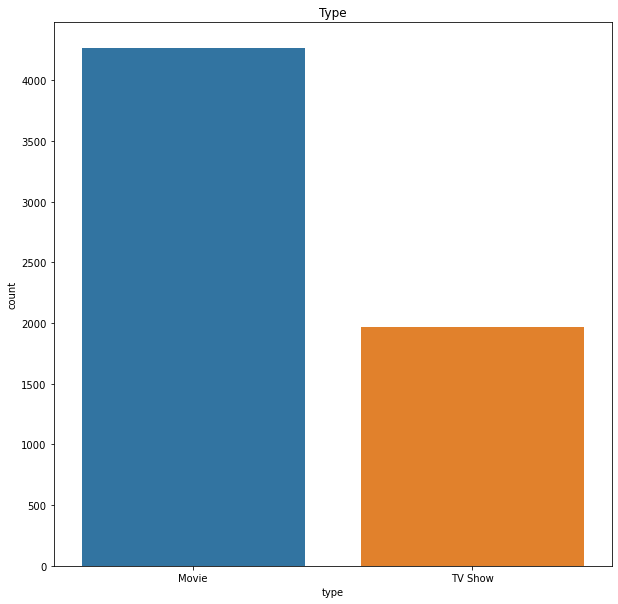

In [16]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

### Rating of shows and movies

Text(0.5, 1.0, 'Rating')

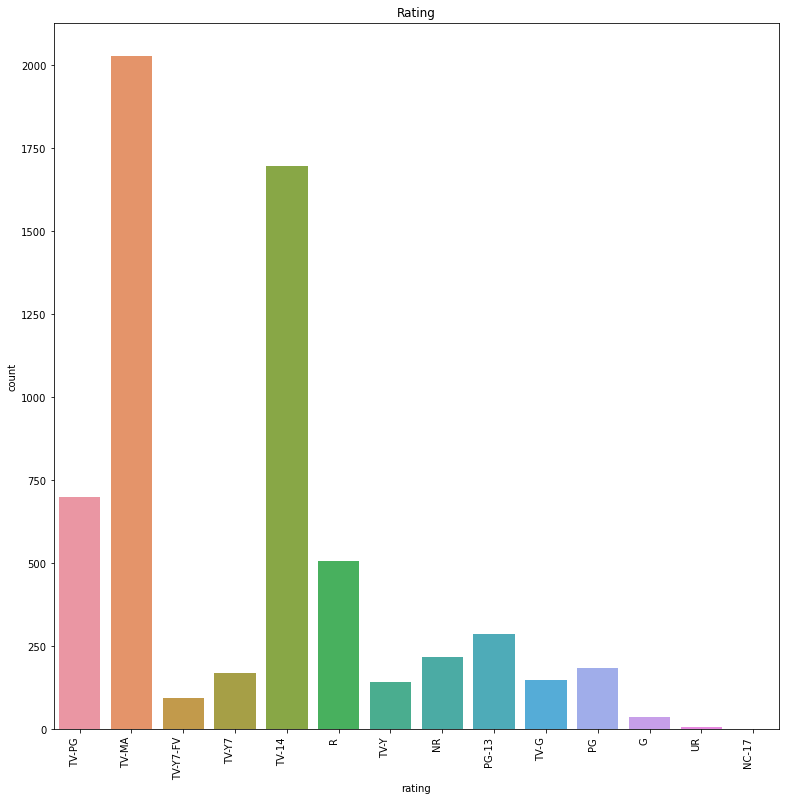

In [17]:
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

### Relation between Type and Rating

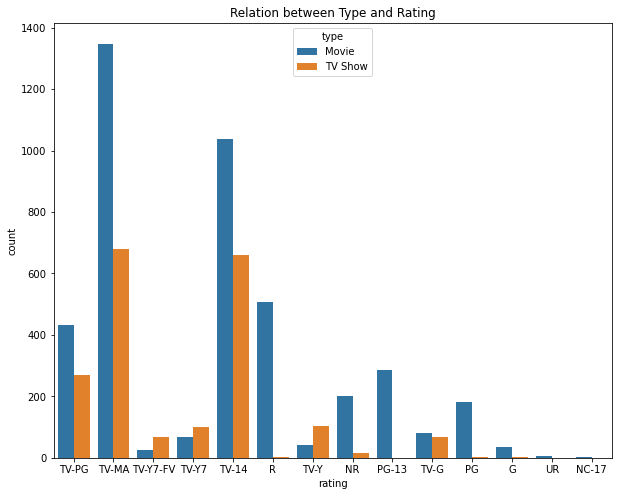

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

### Pie-chart for the Type: Movie and TV Shows

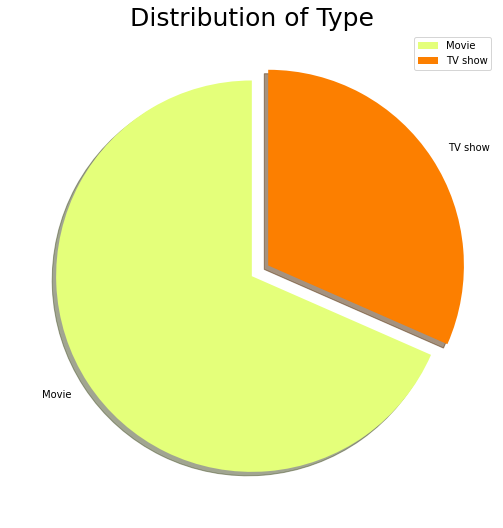

In [19]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

### Pie-chart for Rating

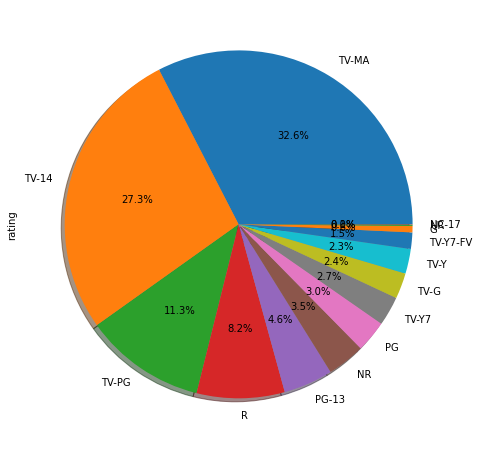

In [20]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# WordCloud

In [21]:
from wordcloud import WordCloud

## Country

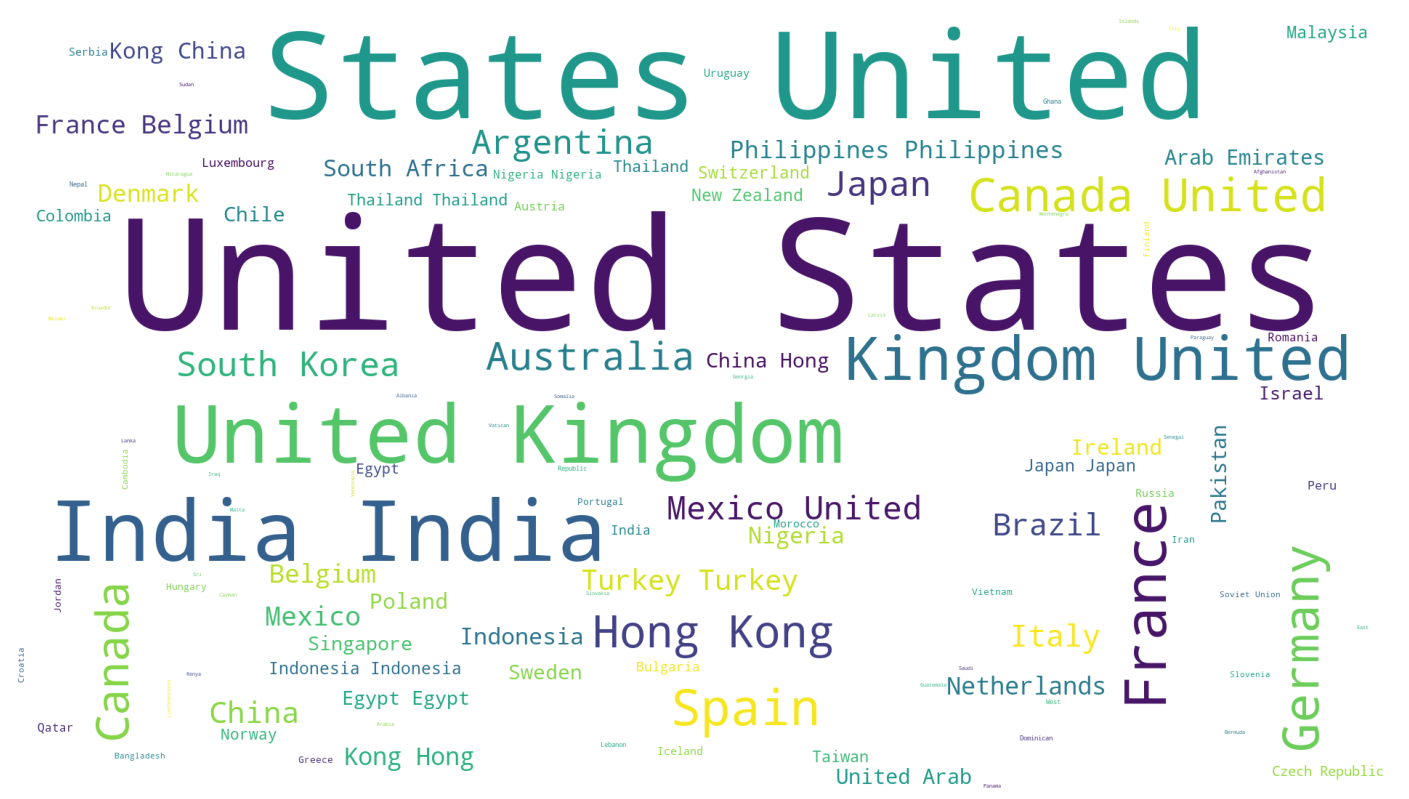

In [22]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

## Cast in the Shows

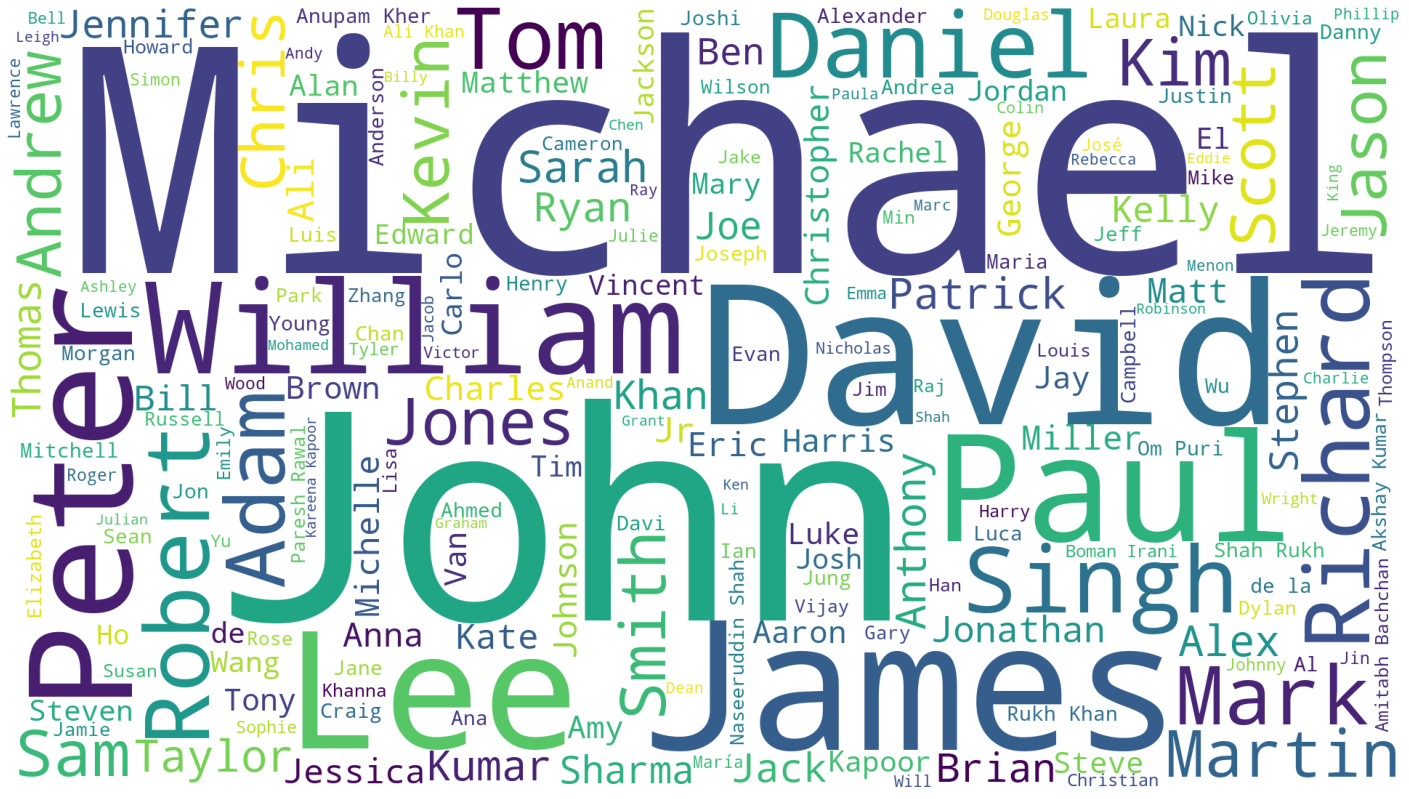

In [23]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

## Directors

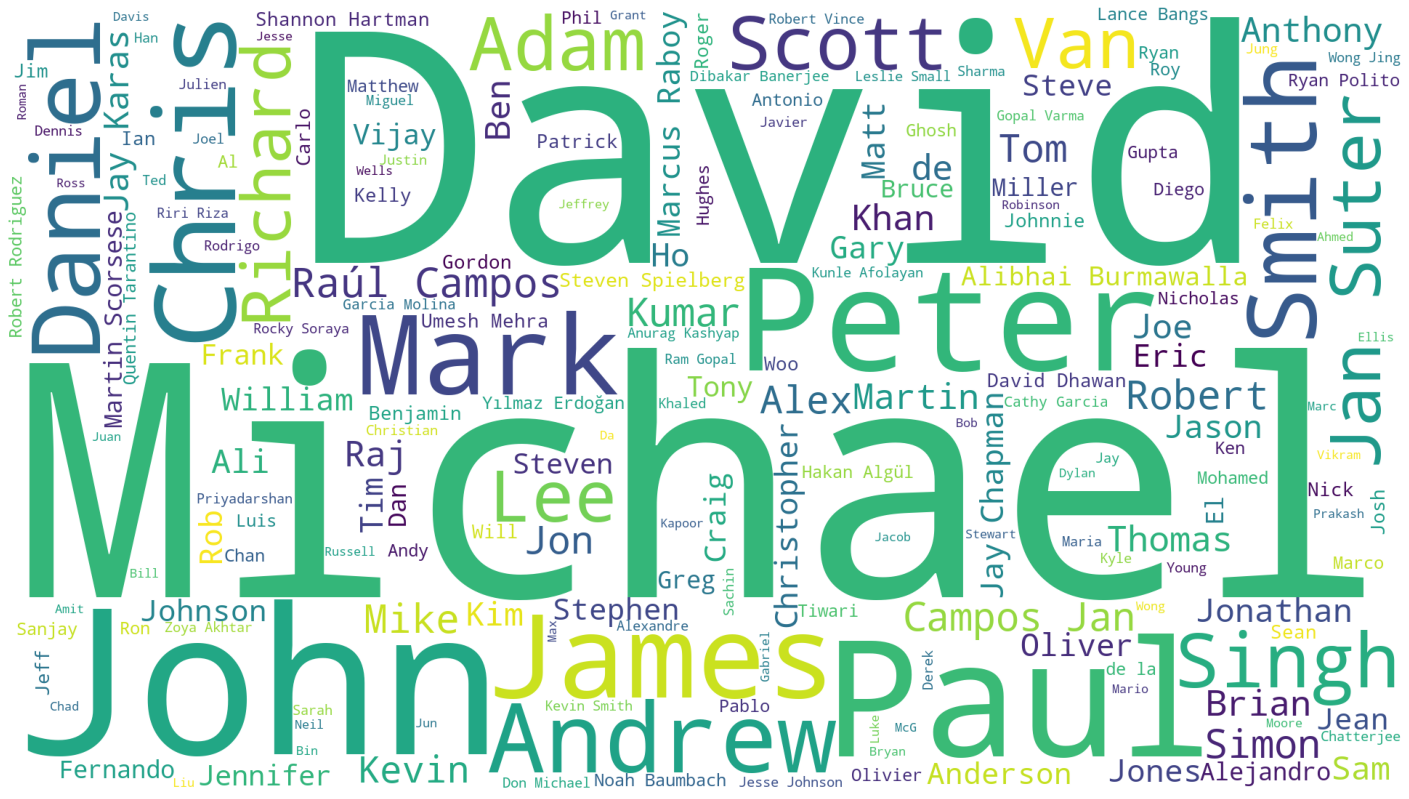

In [24]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

## Categories

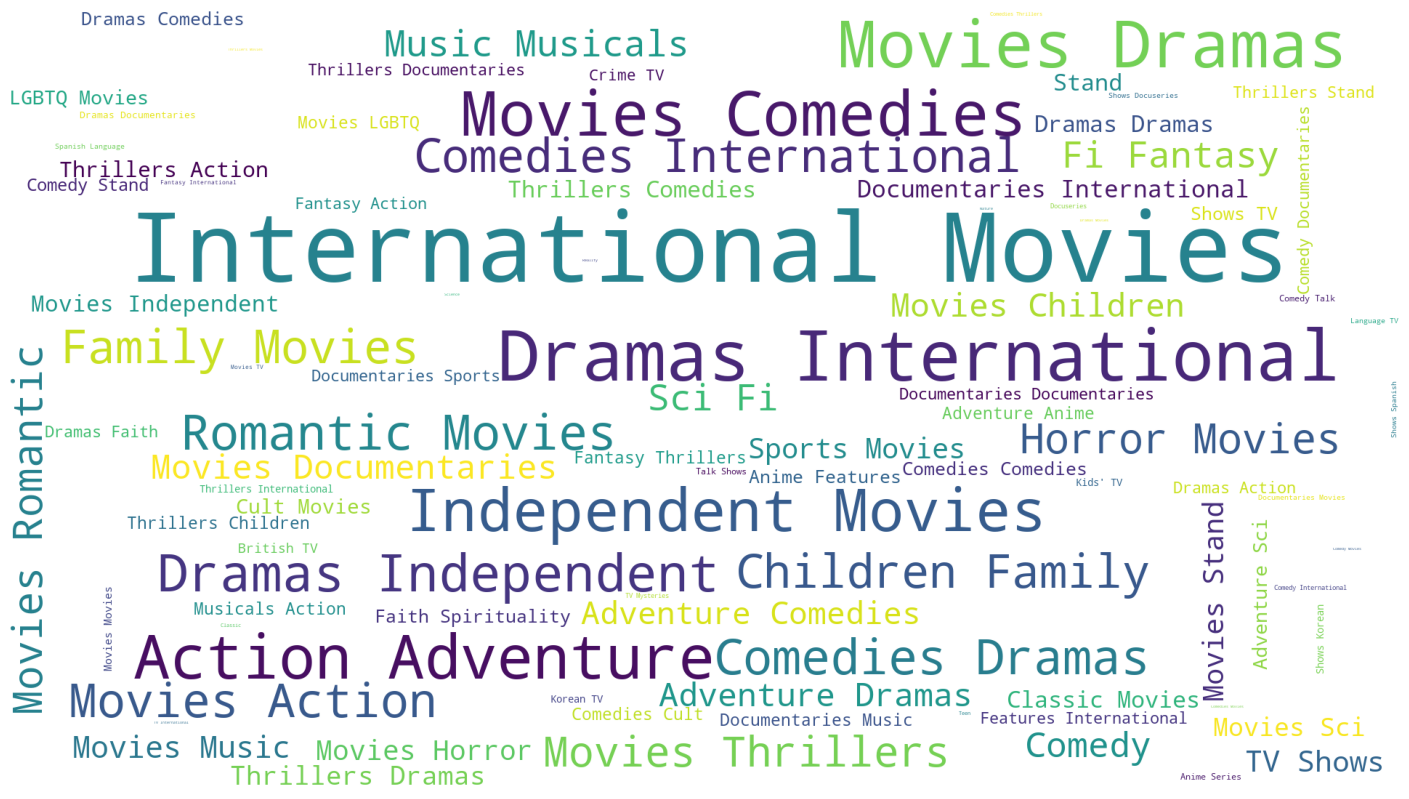

In [25]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

### RECCOMENDATION ANALYSIS

In [26]:
!pip install rake_nltk

In [27]:
import pandas as pd
from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
df = pd.read_csv('netflix_titles.csv')

In [29]:
df = df[['title','type','listed_in','rating','director','cast','description']]
df.head()

,title,type,listed_in,rating,director,cast,description
0,Norm of the North: King Sized Adventure,Movie,"Children & Family Movies, Comedies",TV-PG,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,Movie,Stand-Up Comedy,TV-MA,NaN,Jandino Asporaat,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,TV Show,Kids' TV,TV-Y7-FV,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...","With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,TV Show,Kids' TV,TV-Y7,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",When a prison ship crash unleashes hundreds of...
4,#realityhigh,Movie,Comedies,TV-14,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",When nerdy high schooler Dani finally attracts...


In [30]:
#converting the entire description column into a list
#where every word is an element and renaming the description column into bag_of_words.
df['Key_words'] = ""

for index, row in df.iterrows():
    plot = row['description']
    r = Rake()
    r.extract_keywords_from_text(plot)
    key_words_dict_scores = r.get_word_degrees()
    #a rating is also assigned to every word
    row['Key_words'] = list(key_words_dict_scores.keys())
    
df.drop(columns = ['description'], inplace = True)
df.head()

,title,type,listed_in,rating,director,cast,Key_words
0,Norm of the North: King Sized Adventure,Movie,"Children & Family Movies, Comedies",TV-PG,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","[evil, archaeologist, first, planning, stolen,..."
1,Jandino: Whatever it Takes,Movie,Stand-Up Comedy,TV-MA,NaN,Jandino Asporaat,"[raising, kids, fire, jandino, asporaat, riffs..."
2,Transformers Prime,TV Show,Kids' TV,TV-Y7-FV,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...","[autobots, megatron, leader, decepticons, onsl..."
3,Transformers: Robots in Disguise,TV Show,Kids' TV,TV-Y7,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...","[decepticons, earth, new, autobot, force, prot..."
4,#realityhigh,Movie,Comedies,TV-14,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...","[social, media, celebrity, nerdy, high, school..."


In [31]:
df.isnull().sum()

title           0
type            0
listed_in       0
rating         10
director     1969
cast          570
Key_words       0
dtype: int64

In [32]:
df['cast'] = df['cast'].fillna('')
df['director'] = df['director'].fillna('')
df['rating'] = df['rating'].fillna('')

df['cast'] = df['cast'].map(lambda x: x.split(',')[:3])
df['director'] = df['director'].map(lambda x: x.split(',')[:3])

In [33]:
df['listed_in'] = df['listed_in'].map(lambda x: x.lower().split(','))
df.head()

,title,type,listed_in,rating,director,cast,Key_words
0,Norm of the North: King Sized Adventure,Movie,"[children & family movies, comedies]",TV-PG,"[Richard Finn, Tim Maltby]","[Alan Marriott, Andrew Toth, Brian Dobson]","[evil, archaeologist, first, planning, stolen,..."
1,Jandino: Whatever it Takes,Movie,[stand-up comedy],TV-MA,[],[Jandino Asporaat],"[raising, kids, fire, jandino, asporaat, riffs..."
2,Transformers Prime,TV Show,[kids' tv],TV-Y7-FV,[],"[Peter Cullen, Sumalee Montano, Frank Welker]","[autobots, megatron, leader, decepticons, onsl..."
3,Transformers: Robots in Disguise,TV Show,[kids' tv],TV-Y7,[],"[Will Friedle, Darren Criss, Constance Zimmer]","[decepticons, earth, new, autobot, force, prot..."
4,#realityhigh,Movie,[comedies],TV-14,[Fernando Lebrija],"[Nesta Cooper, Kate Walsh, John Michael Higg...","[social, media, celebrity, nerdy, high, school..."


In [34]:
#removing all spaces between words and names
#convering all the words into lower case
for index, row in df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
for index, row in df.iterrows():
    row['director'] = [x.lower().replace(' ','') for x in row['director']]
for index, row in df.iterrows():
    row['listed_in'] = [x.lower().replace(' ','') for x in row['listed_in']]

In [35]:
#all the columns, recommendation is based on, should be all lists
df['rating'] = df['rating'].map(lambda x: x.lower())
df['rating'] = df['rating'].map(lambda x: x.replace('-',''))
df['type'] = df['type'].map(lambda x: x.lower())
df['type'] = df['type'].map(lambda x: x.replace(' ',''))
df['type'] = df['type'].map(lambda x: x.lower().split(','))
df['rating'] = df['rating'].map(lambda x: x.lower().split(','))

In [36]:
df.set_index('title', inplace = True)
df.head()

,type,listed_in,rating,director,cast,Key_words
title,,,,,,
Norm of the North: King Sized Adventure,[movie],"[children&familymovies, comedies]",[tvpg],"[richardfinn, timmaltby]","[alanmarriott, andrewtoth, briandobson]","[evil, archaeologist, first, planning, stolen,..."
Jandino: Whatever it Takes,[movie],[stand-upcomedy],[tvma],[],[jandinoasporaat],"[raising, kids, fire, jandino, asporaat, riffs..."
Transformers Prime,[tvshow],[kids'tv],[tvy7fv],[],"[petercullen, sumaleemontano, frankwelker]","[autobots, megatron, leader, decepticons, onsl..."
Transformers: Robots in Disguise,[tvshow],[kids'tv],[tvy7],[],"[willfriedle, darrencriss, constancezimmer]","[decepticons, earth, new, autobot, force, prot..."
#realityhigh,[movie],[comedies],[tv14],[fernandolebrija],"[nestacooper, katewalsh, johnmichaelhiggins]","[social, media, celebrity, nerdy, high, school..."


In [37]:
#creating a bag_of_words
#combining all the lists into a single list
df['bag_of_words'] = ''
columns = df.columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        words = words + ' '.join(row[col])+ ' '
    row['bag_of_words'] = words
    
df.drop(columns = [col for col in df.columns if col!= 'bag_of_words'], inplace = True)

In [38]:
df.head()

,bag_of_words
title,
Norm of the North: King Sized Adventure,movie children&familymovies comedies tvpg rich...
Jandino: Whatever it Takes,movie stand-upcomedy tvma jandinoasporaat rai...
Transformers Prime,tvshow kids'tv tvy7fv petercullen sumaleemont...
Transformers: Robots in Disguise,tvshow kids'tv tvy7 willfriedle darrencriss c...
#realityhigh,movie comedies tv14 fernandolebrija nestacoope...


In [39]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])

indices = pd.Series(df.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                 Jandino: Whatever it Takes
2                         Transformers Prime
3           Transformers: Robots in Disguise
4                               #realityhigh
Name: title, dtype: object

In [40]:
# generating the cosine similarity matrix
# comparing bag_of_words of every title with every other title creating nxn matrix where n is total number of rows(titles)
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.04588315, 0.        , ..., 0.1       , 0.        ,
        0.        ],
       [0.04588315, 1.        , 0.05407381, ..., 0.05735393, 0.05006262,
        0.        ],
       [0.        , 0.05407381, 1.        , ..., 0.        , 0.05143445,
        0.04811252],
       ...,
       [0.1       , 0.05735393, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.05006262, 0.05143445, ..., 0.        , 1.        ,
        0.08908708],
       [0.        , 0.        , 0.04811252, ..., 0.        , 0.08908708,
        1.        ]])

In [41]:
def recommendations(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indexes = list(score_series.iloc[1:11].index)
    for i in top_10_indexes:
        recommended_movies.append(list(df.index)[i])
        
    return recommended_movies

In [42]:
# Time for some recommendations
recommendations('Naruto Shippuden : Blood Prison')

['Naruto Shippuden: The Movie: The Lost Tower',
 'Naruto Shippuden: The Movie',
 'Naruto Shippûden the Movie: The Will of Fire',
 'Naruto Shippûden the Movie: Bonds',
 'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
 'Naruto the Movie 2: Legend of the Stone of Gelel',
 'The End of Evangelion',
 'The Seven Deadly Sins the Movie: Prisoners of the Sky',
 'Naruto',
 'InuYasha the Movie: Affections Touching Across Time']

In [43]:
recommendations('PK')

['3 Idiots',
 'Merku Thodarchi Malai',
 'Dil Chahta Hai',
 'Hattrick',
 'EMI: Liya Hai To Chukana Padega',
 'ROMA',
 'English Babu Desi Mem',
 'Cappuccino',
 'Ek Main Aur Ekk Tu',
 'Harishchandrachi Factory']